# Star Type and Luminosity # 
This notebook aims to use the temperature and luminosity of a star to predict its type (using columns "Temperature (K)" and "Luminosity (L/Lo)" to predict column "Star Type") by using multivariate regression.

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

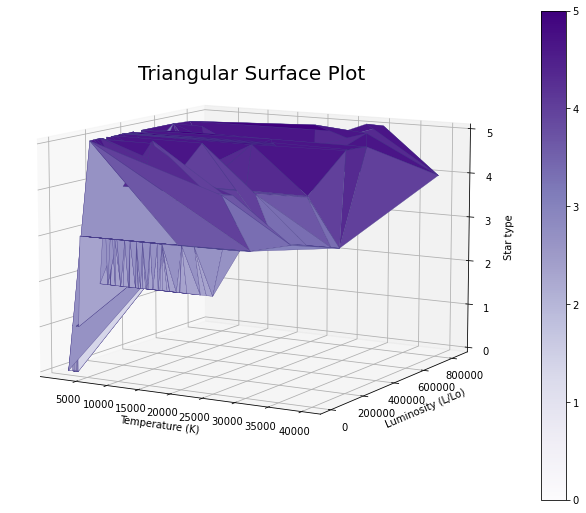

In [2]:
# getting values from dataset
starData = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
x = starData['Temperature (K)'].values
y = starData['Luminosity(L/Lo)'].values
z = starData['Star type'].values

# establishing axes + styling
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Luminosity (L/Lo)')
ax.set_zlabel('Star type')
ax.view_init(elev=10)
ax.set_title('Triangular Surface Plot', fontsize=20, y=0.92)

# plotting trisurf graph
trisurf = ax.plot_trisurf(x, y, z, edgecolor='darkslateblue', cmap=plt.get_cmap('Purples'), linewidth=0.3)
fig.colorbar(trisurf)

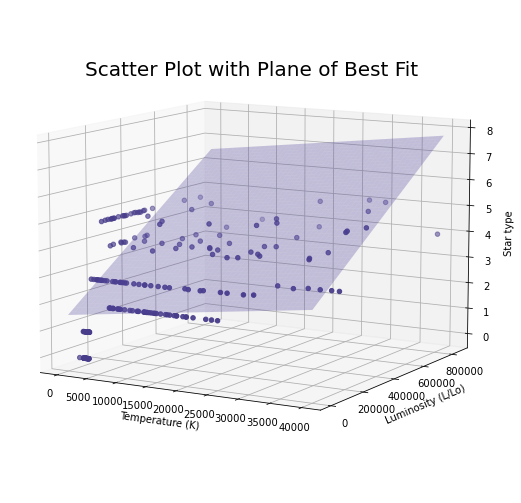

In [3]:
# using linear regression to get coefficients and intercept
regr = linear_model.LinearRegression()
regr.fit(starData[['Temperature (K)', 'Luminosity(L/Lo)']].values, starData[['Star type']].values)
# print('Regression coefficients:', regr.coef_)
# print('Regression intercept:', regr.intercept_)


# graphing surface/plane of best fit using lin regression coefficient and intercept found above
x2 = np.linspace(0,40000,50)
y2 = np.linspace(0,850000,50)
X, Y = np.meshgrid(x2,y2)
Z = .0000307039357*X + .00000581258017*Y + 1.55464564


# establishing axes + styling
fig2 = plt.figure(figsize=(16,9))
ax2 = fig2.add_subplot(projection='3d')
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('Luminosity (L/Lo)')
ax2.set_zlabel('Star type')
ax2.view_init(elev=10)
ax2.set_title('Scatter Plot with Plane of Best Fit', fontsize=20, y=0.92)


# plotting scatter points and surface of best fit 
ax2.scatter(x, y, z, color='darkslateblue')
ax2.plot_surface(X, Y, Z, color='slateblue', alpha=0.3)

In [4]:
# run this to predict the star type using temperature and luminosity!
print('Star types: \n 0 = Brown Dwarf \n 1 = Red Dwarf \n 2 = White Dwarf \n 3 = Main Sequence \n 4 = Supergiant \n 5 = Hypergiant \n')

# modify the first parameter for temperature, the second for luminosity
print('Predicted star type:', regr.predict([[7700, 0.00011]]))

Star types: 
 0 = Brown Dwarf 
 1 = Red Dwarf 
 2 = White Dwarf 
 3 = Main Sequence 
 4 = Supergiant 
 5 = Hypergiant 

Predicted star type: [[1.79106595]]
